## 1. Сбор, просмотр данных.

Для ответа на вопрос падает или расчет уровень счастья в мире возьмем с сайта https://worldhappiness.report данные по изменению индекса счастья за более длительный период.

Для прочтения файла загружаем библиотеку pandas и openpyxl.

In [1]:
import pandas as pd

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
happiness = pd.read_excel("DataForTable2.1WHR2023.xlsx")
happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


Узнаем какой самый ранний год представлен в данной таблице. Также проверим последний год.

In [4]:
happiness.year.min(), happiness.year.max()

(2005, 2022)

## 2. Оценка качества и объема датасета.

In [5]:
happiness.shape

(2199, 11)

In [6]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


## 3. Обработка и очистка датасета.

### 3.1 Удалим столбцы с лишними данными.

In [7]:
happiness = happiness.drop(columns = ['Positive affect', 'Negative affect'],   axis = 1)
happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620
...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945


### 3.2 Переименуем столбцы датасета как в отчете 2023 года.

In [8]:
happiness.rename(columns = { 'Country name':'Страна', 'year':'Год', 'Life Ladder':'Рейтинг', 'Log GDP per capita':'ВВП на душу населения', 'Social support':'Социальная поддержка', 'Healthy life expectancy at birth':'Ожидаемая продолжительность здоровой жизни', 'Freedom to make life choices':'Свобода жизненного выбора', 'Generosity':'Щедрость', 'Perceptions of corruption':'Восприятие коррупции'}, inplace = True)
happiness

,Страна,Год,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620
...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945


### 3.3 В отчете 2023 года добавим столбец с годом и заполним его.

In [9]:
happiness2023 = pd.read_csv("happiness2023.csv")
happiness2023

,Страна,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891


In [10]:
happiness2023['Год'] = 2023
happiness2023

,Страна,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции,Год
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2023
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2023
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2023
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2023
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2023
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,2023
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,2023
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,2023
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2023


### 3.4 Объединим отчеты с 2005 года по 2023 год.

In [11]:
happiness_total = pd.concat([happiness, happiness2023])
happiness_total

,Страна,Год,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),2023,3.207000,7.007000,0.652000,55.375000,0.664000,0.086000,0.834000
133,Zimbabwe,2023,3.204000,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000
134,Sierra Leone,2023,3.138000,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000
135,Lebanon,2023,2.392000,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000


Проверим количество строк объединенного отчета.

In [12]:
happiness.count(), happiness2023.count(), happiness_total.count()

(Страна                                        2199
 Год                                           2199
 Рейтинг                                       2199
 ВВП на душу населения                         2179
 Социальная поддержка                          2186
 Ожидаемая продолжительность здоровой жизни    2145
 Свобода жизненного выбора                     2166
 Щедрость                                      2126
 Восприятие коррупции                          2083
 dtype: int64,
 Страна                                        137
 Рейтинг                                       137
 ВВП на душу населения                         137
 Социальная поддержка                          137
 Ожидаемая продолжительность здоровой жизни    136
 Свобода жизненного выбора                     137
 Щедрость                                      137
 Восприятие коррупции                          137
 Год                                           137
 dtype: int64,
 Страна                                    

### 3.5 Сохраним обработанный датасет в csv-файл для дальнейшего анализа.

In [13]:
happiness_total.to_csv('happiness_total.csv', index=False)

## 4. Анализ данных, расчет показателей, поиск взаимосвязей.

Узнаем сколько стран за все годы оценки счастья с мире попадали в рейтинги и их названия.

In [14]:
happiness_total['Страна'].value_counts()

Страна
Lebanon       18
Indonesia     18
Kyrgyzstan    18
Kenya         18
Kazakhstan    18
              ..
Maldives       1
Guyana         1
Suriname       1
Oman           1
Cuba           1
Name: count, Length: 165, dtype: int64

In [16]:
happiness_total['Страна'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

Посмотрим как изменялся максимальный,минимальный и средний уровень счастья в разные годы.

In [41]:
happiness_total.groupby(['Год']).agg({'Рейтинг': ['max', 'min', 'mean']})

Рейтинг                    
           max       min      mean
Год                               
2005  8.018934  4.718734  6.446164
2006  7.672449  3.202429  5.196935
2007  7.834233  3.280247  5.418291
2008  7.970892  2.807855  5.418554
2009  7.683359  3.407508  5.457640
2010  7.770515  3.229129  5.496782
2011  7.788232  2.936221  5.424088
2012  7.776209  3.164491  5.443612
2013  7.593794  2.687553  5.393302
2014  7.507559  2.838959  5.386267
2015  7.603434  2.701591  5.400948
2016  7.659843  2.693061  5.396381
2017  7.788252  2.661718  5.460421
2018  7.858107  2.694303  5.498683
2019  7.780348  2.375092  5.570995
2020  7.889350  2.633753  5.727539
2021  7.794378  2.178809  5.636193
2022  7.728998  1.281271  5.585126
2023  7.804000  1.859000  5.539796

<Axes: xlabel='Год', ylabel='Рейтинг'>

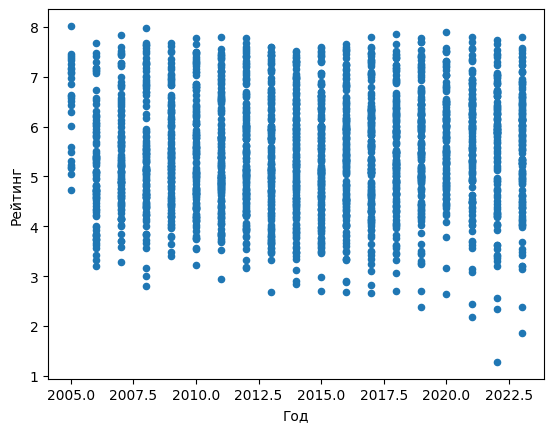

In [30]:
happiness_total.plot(kind='scatter', x='Год', y='Рейтинг')

Как мы видим, уровень счастья падает и в рейтинг попадают страны даже с маленькими баллами.